# Análisis Exporatorio de los datos

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os

### Carga y Configuración de Datos

In [2]:
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Rutas relativas
BASE_DIR = "../../data/processed/tlc_clean"
ANIO_ANALISIS = "2025" # Se puede cambiar

In [3]:
# --- FUNCIÓN DE CARGA ---
def cargar_datos(tipo_vehiculo, anio, muestra=0.1):
    """
    Carga los datos de la carpeta específica (yellow o fhvhv).
    Muestra: 0.1 carga el 10% de los datos para ir rápido.
    """
    ruta_busqueda = os.path.join(BASE_DIR, tipo_vehiculo, anio, "*.parquet")
    archivos = glob.glob(ruta_busqueda)
    
    if not archivos:
        print(f" No se han encontrado archivos en: {ruta_busqueda}")
        return pd.DataFrame() # Devuelve vacío si falla
    
    print(f" Cargando {len(archivos)} archivos de {tipo_vehiculo} ({anio})...")
    
    dfs = []
    for f in archivos:
        try:
            df_temp = pd.read_parquet(f)
            # Cogemos una muestra aleatoria para no saturar la RAM
            if muestra < 1.0:
                df_temp = df_temp.sample(frac=muestra, random_state=42)
            dfs.append(df_temp)
        except Exception as e:
            print(f"Error leyendo {f}: {e}")
            
    if dfs:
        df_final = pd.concat(dfs, ignore_index=True)
        df_final['tipo_vehiculo'] = tipo_vehiculo # Etiqueta clave para diferenciar
        return df_final
    return pd.DataFrame()

In [4]:
# --- EJECUCIÓN DE CARGA ---
df_yellow = cargar_datos("yellow", ANIO_ANALISIS, muestra=0.1)
df_vtc = cargar_datos("fhvhv", ANIO_ANALISIS, muestra=0.1)      

# Unimos todo (dataframe global)
df = pd.concat([df_yellow, df_vtc], ignore_index=True)

if 'fecha_inicio' in df.columns:
    print("Ordenando dataset global por fecha...")
    df.sort_values('fecha_inicio', inplace=True)

print(f"\n {len(df):,} viajes cargados.")

 Cargando 11 archivos de yellow (2025)...
 Cargando 11 archivos de fhvhv (2025)...
Ordenando dataset global por fecha...

 26,275,929 viajes cargados.


Hemos decicidido procesar una muestra del 10% de los datos por eficiencia operativa. Ya que esta base de datos cuenta con millones de viajes al mes. 

Analizar 26 millones de viajes nos da las mismas curvas de tendencia y precios que analizar 500 millones, pero nos permite iterar y generar gráficas mucho más rápido. 

In [5]:
display(df.head(10))

,fecha_inicio,fecha_fin,origen_id,destino_id,distancia,precio,duracion_min,tipo_vehiculo,origen_zona,origen_barrio,destino_zona,destino_barrio
3851153,2009-01-01 00:05:50,2009-01-01 00:10:56,239,50,1.260000,14.350000,5.100000,yellow,Upper West Side South,Manhattan,Clinton West,Manhattan
4036854,2009-01-01 14:08:04,2009-01-01 14:45:04,138,142,11.560000,68.480003,37.000000,yellow,LaGuardia Airport,Queens,Lincoln Square East,Manhattan
110570,2024-12-31 20:54:50,2024-12-31 21:30:18,246,48,1.390000,39.840000,35.466667,yellow,West Chelsea/Hudson Yards,Manhattan,Clinton East,Manhattan
4992505,2025-01-01 00:00:00,2025-01-01 00:30:04,247,81,11.700000,26.080000,30.066668,fhvhv,West Concourse,Bronx,Eastchester,Bronx
4789810,2025-01-01 00:00:02,2025-01-01 00:27:02,37,165,5.692000,32.299999,27.000000,fhvhv,Bushwick South,Brooklyn,Midwood,Brooklyn
5889988,2025-01-01 00:00:03,2025-01-01 00:13:13,85,61,2.699000,17.540001,13.166667,fhvhv,Erasmus,Brooklyn,Crown Heights North,Brooklyn
5536595,2025-01-01 00:00:04,2025-01-01 00:05:15,173,56,0.790000,8.890000,5.183333,fhvhv,North Corona,Queens,Corona,Queens
6134459,2025-01-01 00:00:05,2025-01-01 00:39:02,223,201,19.379999,51.290001,38.950001,fhvhv,Steinway,Queens,Rockaway Park,Queens
4636669,2025-01-01 00:00:07,2025-01-01 00:28:26,82,35,11.650000,25.889999,28.316668,fhvhv,Elmhurst,Queens,Brownsville,Brooklyn
6096137,2025-01-01 00:00:10,2025-01-01 00:25:45,158,163,3.510000,41.689999,25.583334,fhvhv,Meatpacking/West Village West,Manhattan,Midtown North,Manhattan


### Visualización de Mercado (Cuota y Precio)

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_12180\253209814.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='tipo_vehiculo', palette=['#F7B500', 'black'])


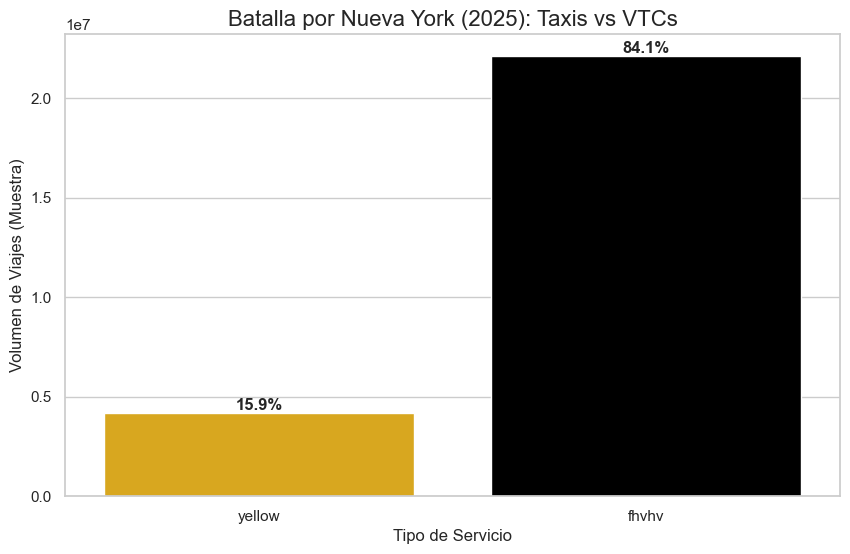

In [ ]:
# --- COMPARACIÓN DE SERVICIOS ---
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='tipo_vehiculo', palette=['#F7B500', 'black'])
plt.title(f"Batalla por Nueva York ({ANIO_ANALISIS}): Taxis vs VTCs", fontsize=16)
plt.ylabel("Volumen de Viajes")
plt.xlabel("Tipo de Servicio")

# Poner porcentajes
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.show()

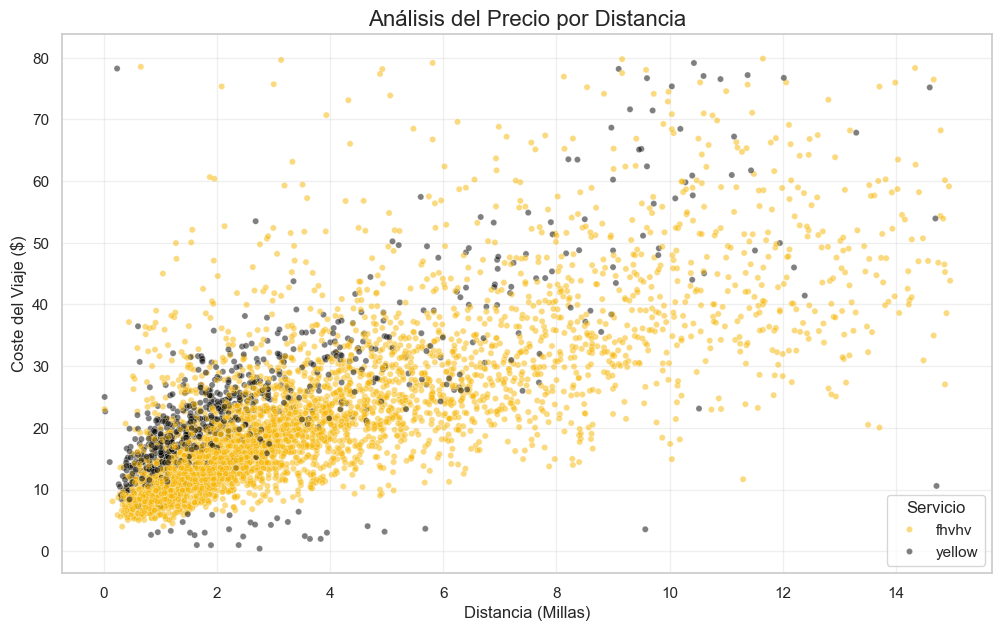

In [7]:
# --- ESTRUCTURA DE PRECIOS ---
# Filtramos distancias cortas/medias para ver bien la diferencia
df_zoom = df[(df.distancia < 15) & (df.precio < 80)].sample(5000)

plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df_zoom, 
    x='distancia', 
    y='precio', 
    hue='tipo_vehiculo', 
    palette=['#F7B500', 'black'],
    alpha=0.5,
    s=20
)
plt.title("Análisis del Precio por Distancia", fontsize=16)
plt.xlabel("Distancia (Millas)")
plt.ylabel("Coste del Viaje ($)")
plt.legend(title="Servicio")
plt.grid(True, alpha=0.3)
plt.show()

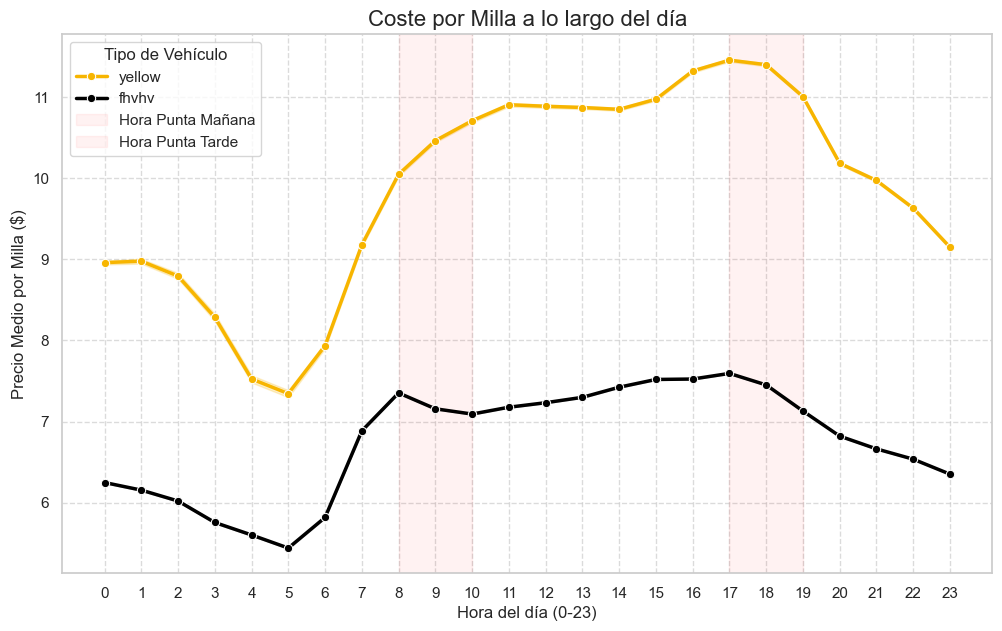

In [8]:
# --- CAMBIO DEL PRECIO A LO LARGO DEL DÍA ---
# 1. Calculamos el Precio por Milla
df_metrics = df[(df.distancia > 0.5) & (df.precio > 2.0)].copy()

df_metrics['precio_por_milla'] = df_metrics['precio'] / df_metrics['distancia']

# 2. Eliminamos outliers extremos del precio por milla
df_metrics = df_metrics[df_metrics['precio_por_milla'] < 20]

# 3. Extraemos la hora 
if 'hora' not in df_metrics.columns:
    df_metrics['hora'] = df_metrics['fecha_inicio'].dt.hour

# Visualización
plt.figure(figsize=(12, 7))

# La sombra alrededor de la línea es el intervalo de confianza (muestra la variación).
sns.lineplot(
    data=df_metrics, 
    x='hora', 
    y='precio_por_milla', 
    hue='tipo_vehiculo', 
    palette=['#F7B500', 'black'],
    linewidth=2.5,
    marker="o"
)

# Añadimos franjas horarias de interés
plt.axvspan(8, 10, color='red', alpha=0.05, label='Hora Punta Mañana')
plt.axvspan(17, 19, color='red', alpha=0.05, label='Hora Punta Tarde')

plt.title("Coste por Milla a lo largo del día", fontsize=16)
plt.xlabel("Hora del día (0-23)")
plt.ylabel("Precio Medio por Milla ($)")
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title="Tipo de Vehículo")
plt.show()

### Análisis de Tráfico y Horas

### Mapa de Demanda por Barrio

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_17464\1680540909.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


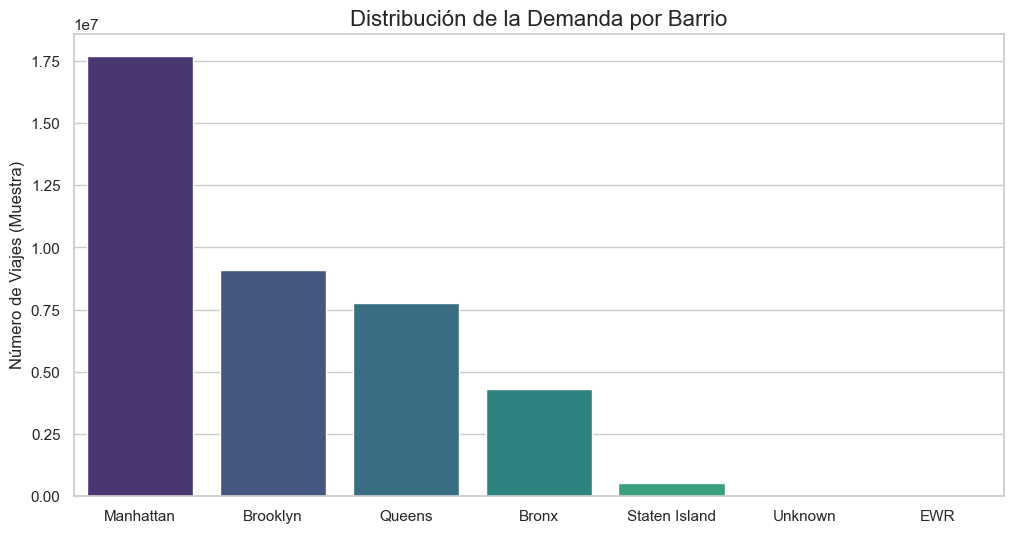

In [14]:
# Contamos viajes por Barrio de Origen
conteo_barrios = df['origen_barrio'].value_counts().reset_index()
conteo_barrios.columns = ['Barrio', 'Viajes']

plt.figure(figsize=(12, 6))
sns.barplot(
    data=conteo_barrios, 
    x='Barrio', 
    y='Viajes', 
    palette='viridis'
)
plt.title("Distribución de la Demanda por Barrio", fontsize=16)
plt.ylabel("Número de Viajes (Muestra)")
plt.xlabel("")
plt.show()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_17464\238022867.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_zonas.values, y=top_zonas.index, palette='magma')


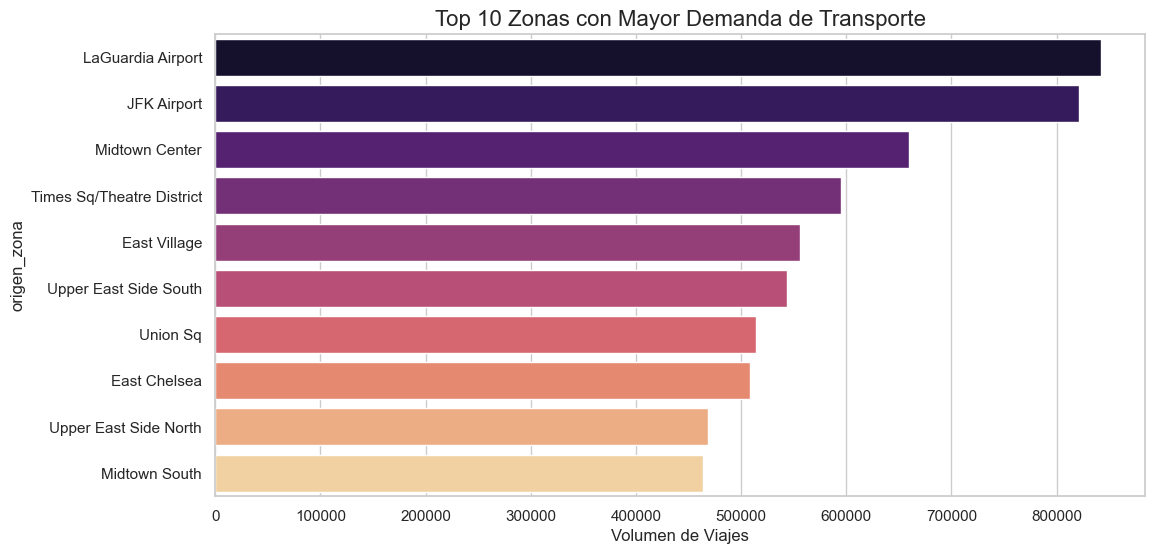

In [15]:
# --- TOP 10 ZONAS ESPECÍFICAS ---
top_zonas = df['origen_zona'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_zonas.values, y=top_zonas.index, palette='magma')
plt.title("Top 10 Zonas con Mayor Demanda de Transporte", fontsize=16)
plt.xlabel("Volumen de Viajes")
plt.show()